# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем)

#### Сделайте необходимые импорты:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [117]:
df = pd.read_csv('sales.csv', sep=',', index_col='Rank')

head15_tail15_df = pd.concat([df.head(15), df.tail(15)])
head15_tail15_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [28]:
data_shape = df.shape

# Выведем результат
print("Форма данных:", data_shape)
print("Всего объектов в датасете:", len(df))

Форма данных: (16598, 11)
Всего объектов в датасете: 16598


Ответ: <span style="color:red">16598</span>

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [120]:
#1) infos = df.info()
#2) df.dtypes
types_array = df.dtypes.astype(str).to_numpy()
print(types_array)

['object' 'object' 'float64' 'object' 'object' 'float64' 'float64'
 'float64' 'float64' 'float64']


Ответ: <span style="color:red">['int64' 'object' 'object' 'float64' 'object' 'object' 'float64' 'float64'
 'float64' 'float64' 'float64']</span>

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [56]:
sales_stats = df['Global_Sales'].describe().round(2)
print(sales_stats[['max', 'mean']])

max     82.74
mean     0.54
Name: Global_Sales, dtype: float64


Ответ: <span style="color:red">82.74 0.54</span>

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [104]:
missing_values = df.isnull().sum()


print("Количество пропусков по каждому признаку:")
print(missing_values)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

df = df.dropna(subset=df.select_dtypes(exclude=['float64', 'int64']).columns)

updated_missing_values = df.isnull().sum()

print("\nКоличество пропусков после обработки:")
print(updated_missing_values)

Количество пропусков по каждому признаку:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Количество пропусков после обработки:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

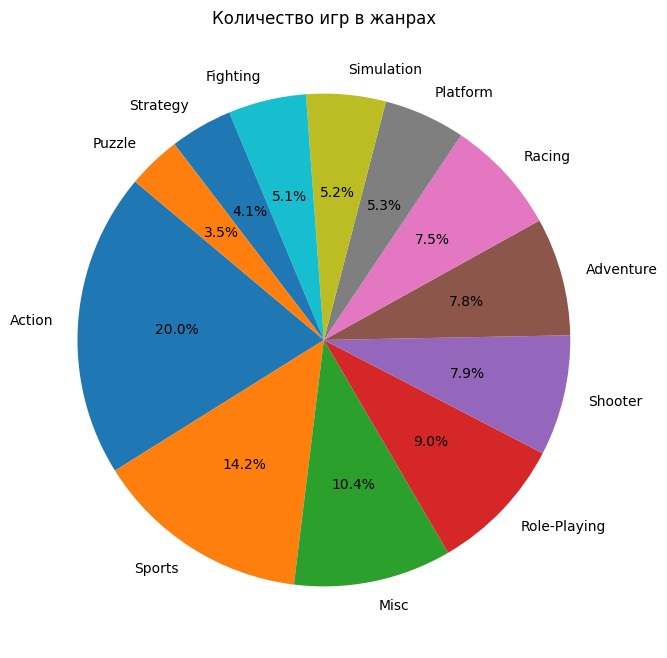

Самый популярный жанр: Action


In [75]:
genre_column = 'Genre'


genre_counts = df[genre_column].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Количество игр в жанрах')
plt.show()


most_popular_genre = genre_counts.idxmax()
print(f"Самый популярный жанр: {most_popular_genre}")

Ответ: <span style="color:red">Action</span>

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

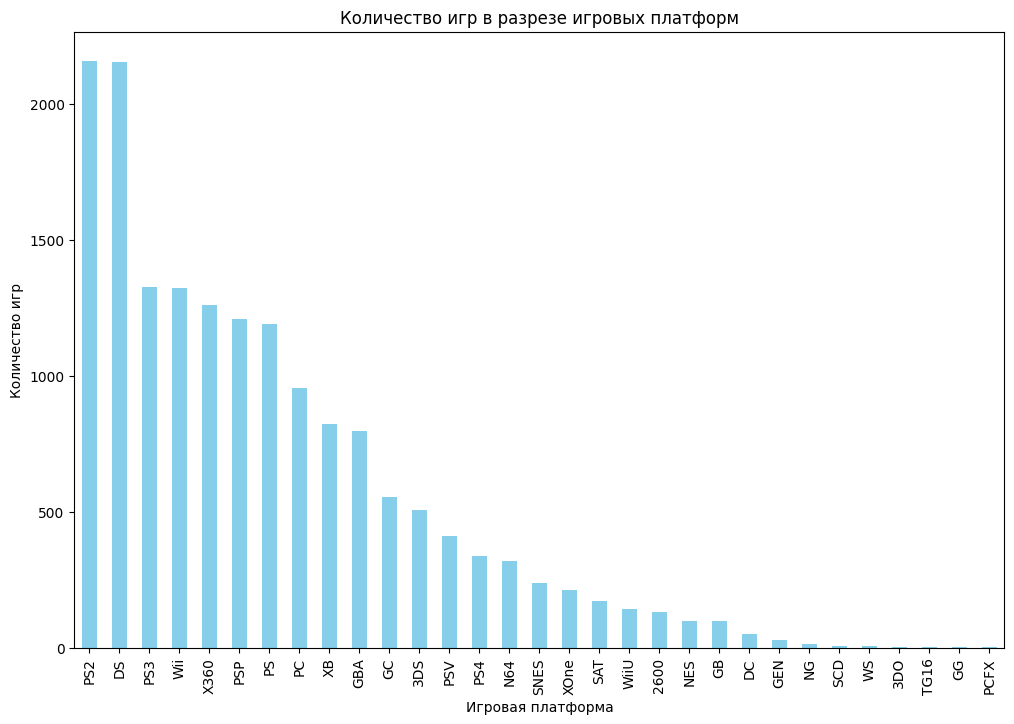

Платформа, под которую выпущено больше всего игр: PS2


In [76]:

platform_column = 'Platform'


platform_counts = df[platform_column].value_counts()


platform_counts = platform_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Количество игр в игровых платформ')
plt.xlabel('Игровая платформа')
plt.ylabel('Количество игр')
plt.show()


most_common_platform = platform_counts.idxmax()
print(f"Платформа, под которую выпущено больше всего игр: {most_common_platform}")

Ответ: <span style="color:red">PS2</span>

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

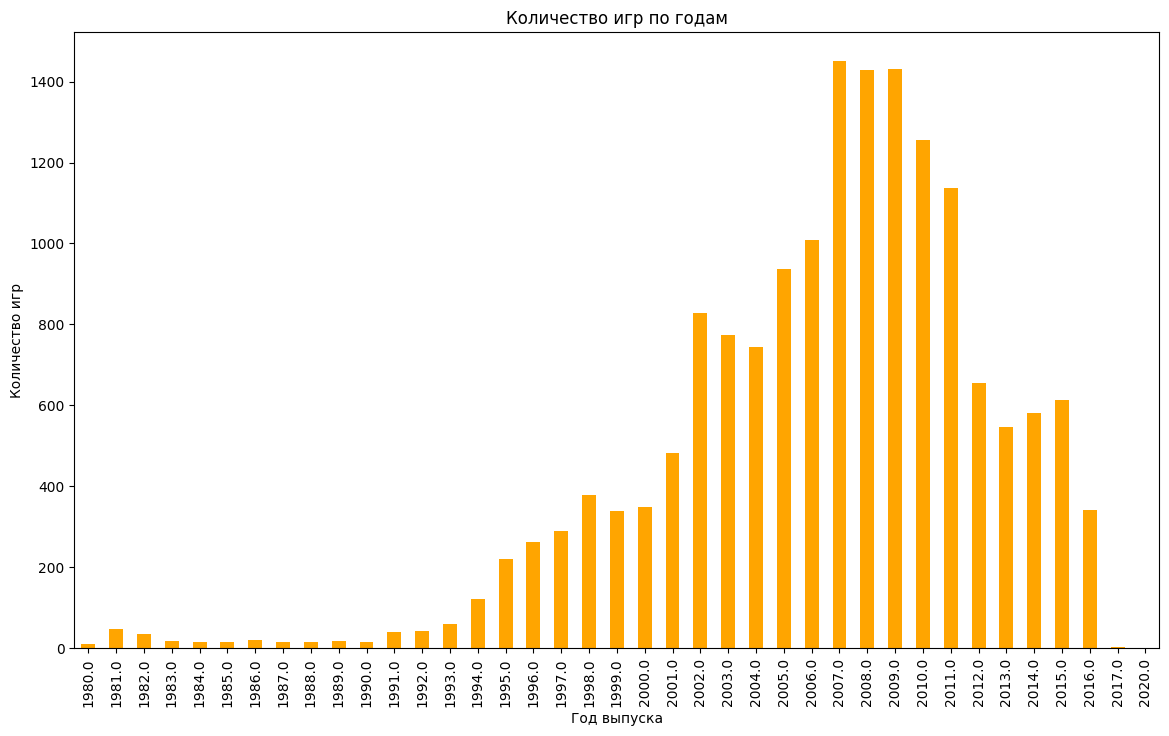

Самая удачная пятилетка для игростроя: 2007 - 2011


In [80]:

year_column = 'Year'


year_counts = df[year_column].value_counts()

year_counts = year_counts.sort_index()


plt.figure(figsize=(14, 8))
year_counts.plot(kind='bar', color='orange')
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

most_successful_five_years = year_counts.rolling(window=5).sum().idxmax()
print(f"Самая удачная пятилетка для игростроя: {round(most_successful_five_years - 4)} - {round(most_successful_five_years)}")

Ответ: <span style="color:red">2007 - 2011</span>

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

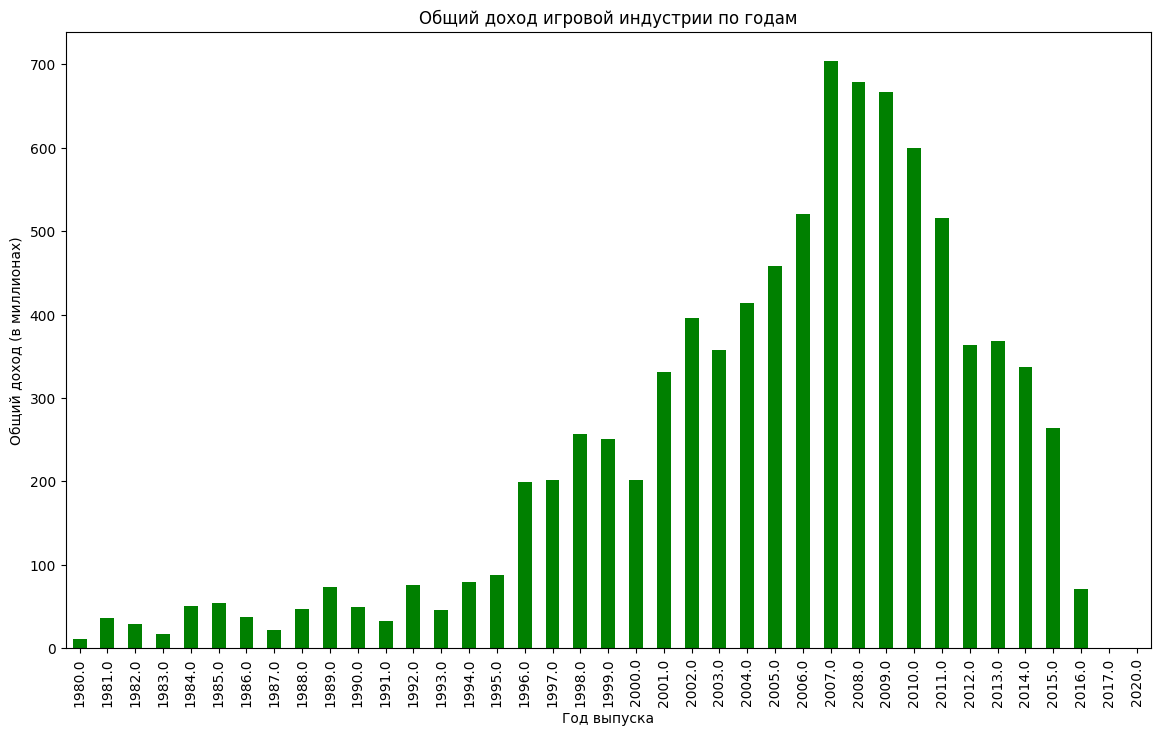

Самый прибыльный год: 2007


In [112]:

year_column = 'Year'
revenue_column = 'Global_Sales'

total_revenue_by_year = df.groupby(year_column)[revenue_column].sum()


total_revenue_by_year = total_revenue_by_year.sort_index()


plt.figure(figsize=(14, 8))

total_revenue_by_year.plot(kind='bar', color='green')

plt.title('Общий доход игровой индустрии по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Общий доход (в миллионах)')
plt.show()


most_profitable_year = total_revenue_by_year.idxmax()
print(f"Самый прибыльный год: {round(most_profitable_year)}")

Ответ: <span style="color:red">2008</span>

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

Пример:
![gr](img/gr.png)

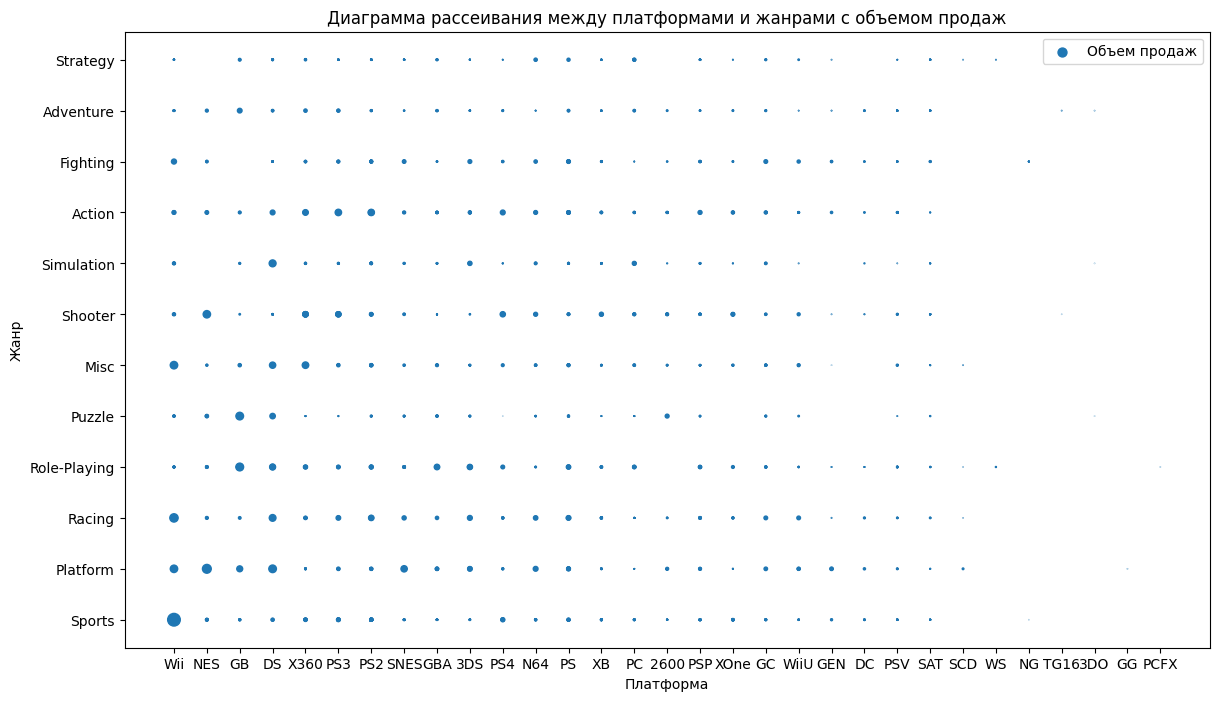

In [113]:
platform_column = 'Platform'
genre_column = 'Genre'
sales_column = 'Global_Sales'


plt.figure(figsize=(14, 8))
plt.scatter(df[platform_column], df[genre_column], s=df[sales_column])

plt.title('Диаграмма рассеивания между платформами и жанрами с объемом продаж')
plt.xlabel('Платформа')
plt.ylabel('Жанр')
plt.legend(['Объем продаж'])
plt.show()

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

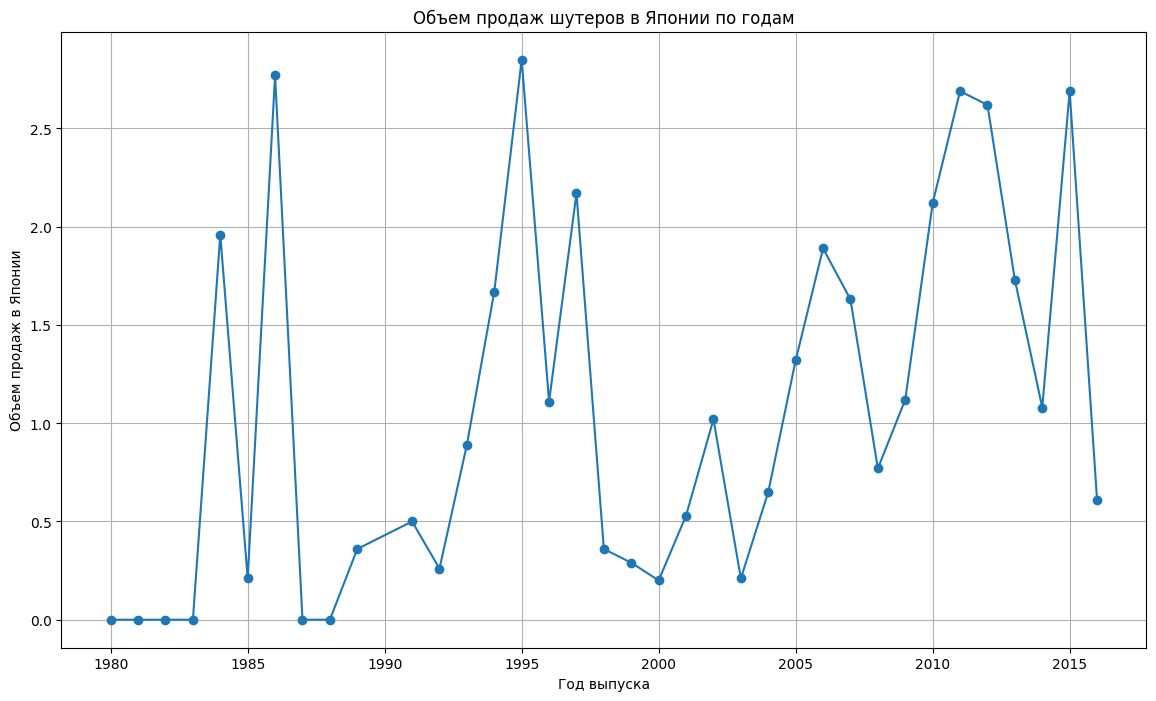

Самый прибыльный год для шутеров в Японии: 1995


In [114]:
year_column = 'Year'
genre_column = 'Genre'
sales_column_japan = 'JP_Sales'


shooter_sales_japan = df[(df[genre_column] == 'Shooter')]


yearly_sales_japan = shooter_sales_japan.groupby(year_column)[sales_column_japan].sum()


plt.figure(figsize=(14, 8))
plt.plot(yearly_sales_japan.index, yearly_sales_japan, marker='o')

plt.title('Объем продаж шутеров в Японии по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Объем продаж в Японии')
plt.grid(True)
plt.show()


most_profitable_year_japan = yearly_sales_japan.idxmax()
print(f"Самый прибыльный год для шутеров в Японии: {round(most_profitable_year_japan)}")

Ответ: <span style="color:red">1995</span>

#### Какие игры являются самыми старыми?

In [119]:
year_column = 'Year'

oldest_game_index = df[year_column].idxmin()
oldest_game = df.loc[oldest_game_index]

print("Самая старая игра:")
print(oldest_game)

Самая старая игра:
Name            Asteroids
Platform             2600
Year               1980.0
Genre             Shooter
Publisher           Atari
NA_Sales              4.0
EU_Sales             0.26
JP_Sales              0.0
Other_Sales          0.05
Global_Sales         4.31
Name: 259, dtype: object


Ответ: <span style="color:red">Asteroids</span>

#### Сколько шутеров было выпущено в 2003 году?

In [118]:
year_column = 'Year'
genre_column = 'Genre'

# Подсчитаем количество шутеров, выпущенных в 2003 году
shooter_2003_count = df[(df[year_column] == 2003) & (df[genre_column] == 'Shooter')].shape[0]

print(f"Количество шутеров, выпущенных в 2003 году: {shooter_2003_count}")

Количество шутеров, выпущенных в 2003 году: 73


Ответ: <span style="color:red">73</span>